In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.chdir('/home/tapas/')
df = pd.read_csv('cs-training.csv').drop('Unnamed: 0', axis = 1)

<Container object of 11 artists>

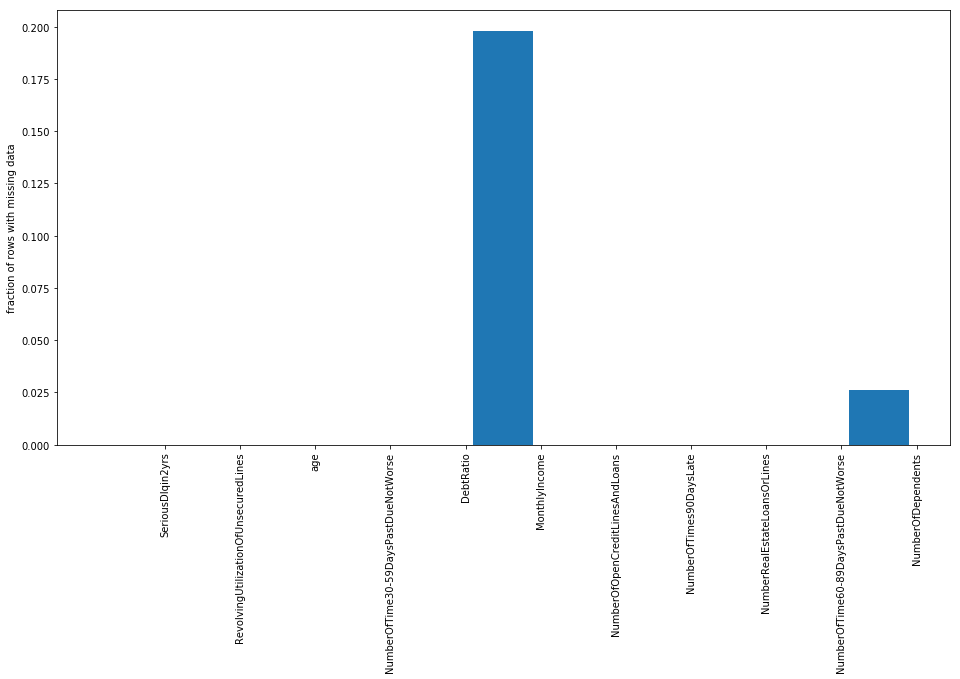

In [3]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [4]:
# To check how many columns have missing values - this can be repeated to see the progress made
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

In [5]:
df[show_missing()].isnull().sum()

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

In [6]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MonthlyIncome,29731,0.198207
NumberOfDependents,3924,0.026160
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberOfOpenCreditLinesAndLoans,0,0.000000
DebtRatio,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
age,0,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000


In [7]:
# crosstab creates a frequency table between 2 variables
# it's going to automatically enumerate the possibilities between
# the two Series and show you a count of occurrences 
#in each possible bucket
def print_null_freq(df):
    """
    for a given DataFrame, calculates how many values for 
    each variable is null and prints the resulting table to stdout
    """
    df_lng = pd.melt(df)
    null_variables = df_lng.value.isnull()
    return pd.crosstab(df_lng.variable, null_variables)
print_null_freq(df)

value,False,True
variable,,
DebtRatio,150000,0
MonthlyIncome,120269,29731
NumberOfDependents,146076,3924
NumberOfOpenCreditLinesAndLoans,150000,0
NumberOfTime30-59DaysPastDueNotWorse,150000,0
NumberOfTime60-89DaysPastDueNotWorse,150000,0
NumberOfTimes90DaysLate,150000,0
NumberRealEstateLoansOrLines,150000,0
RevolvingUtilizationOfUnsecuredLines,150000,0


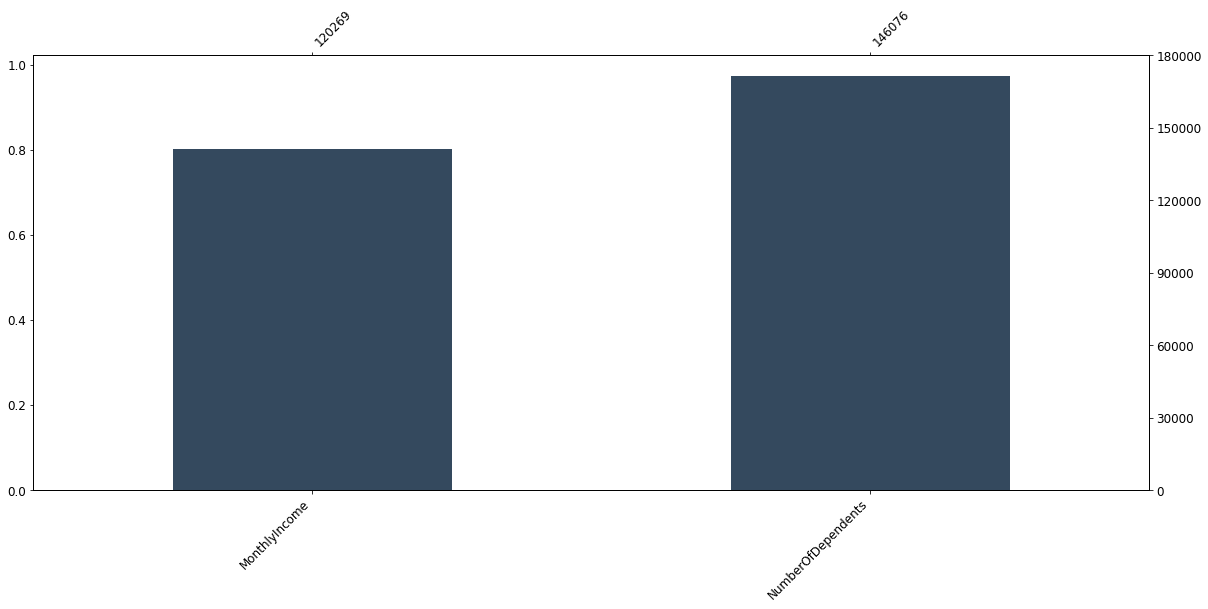

In [11]:
import missingno as msno
missingValueColumns = df.columns[df.isnull().any()].tolist()
msno.bar(df[missingValueColumns],\
            figsize=(20,8),color="#34495e",fontsize=12,labels=True,)

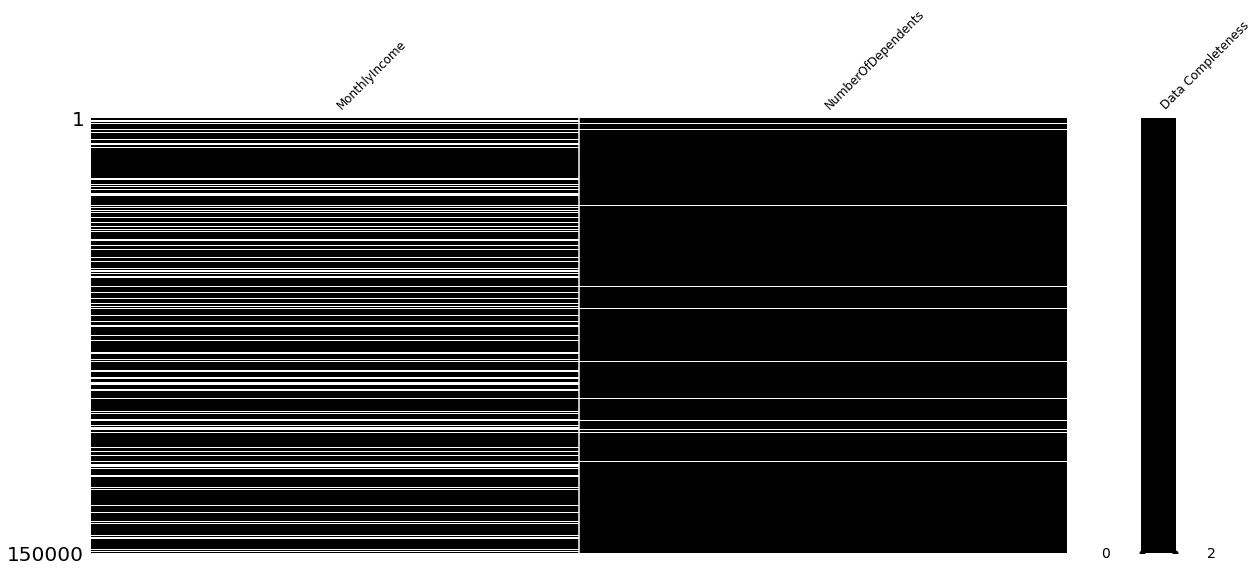

In [12]:
msno.matrix(df[missingValueColumns],width_ratios=(10,1),\
            figsize=(20,8),color=(0,0, 0),fontsize=12,sparkline=True,labels=True)

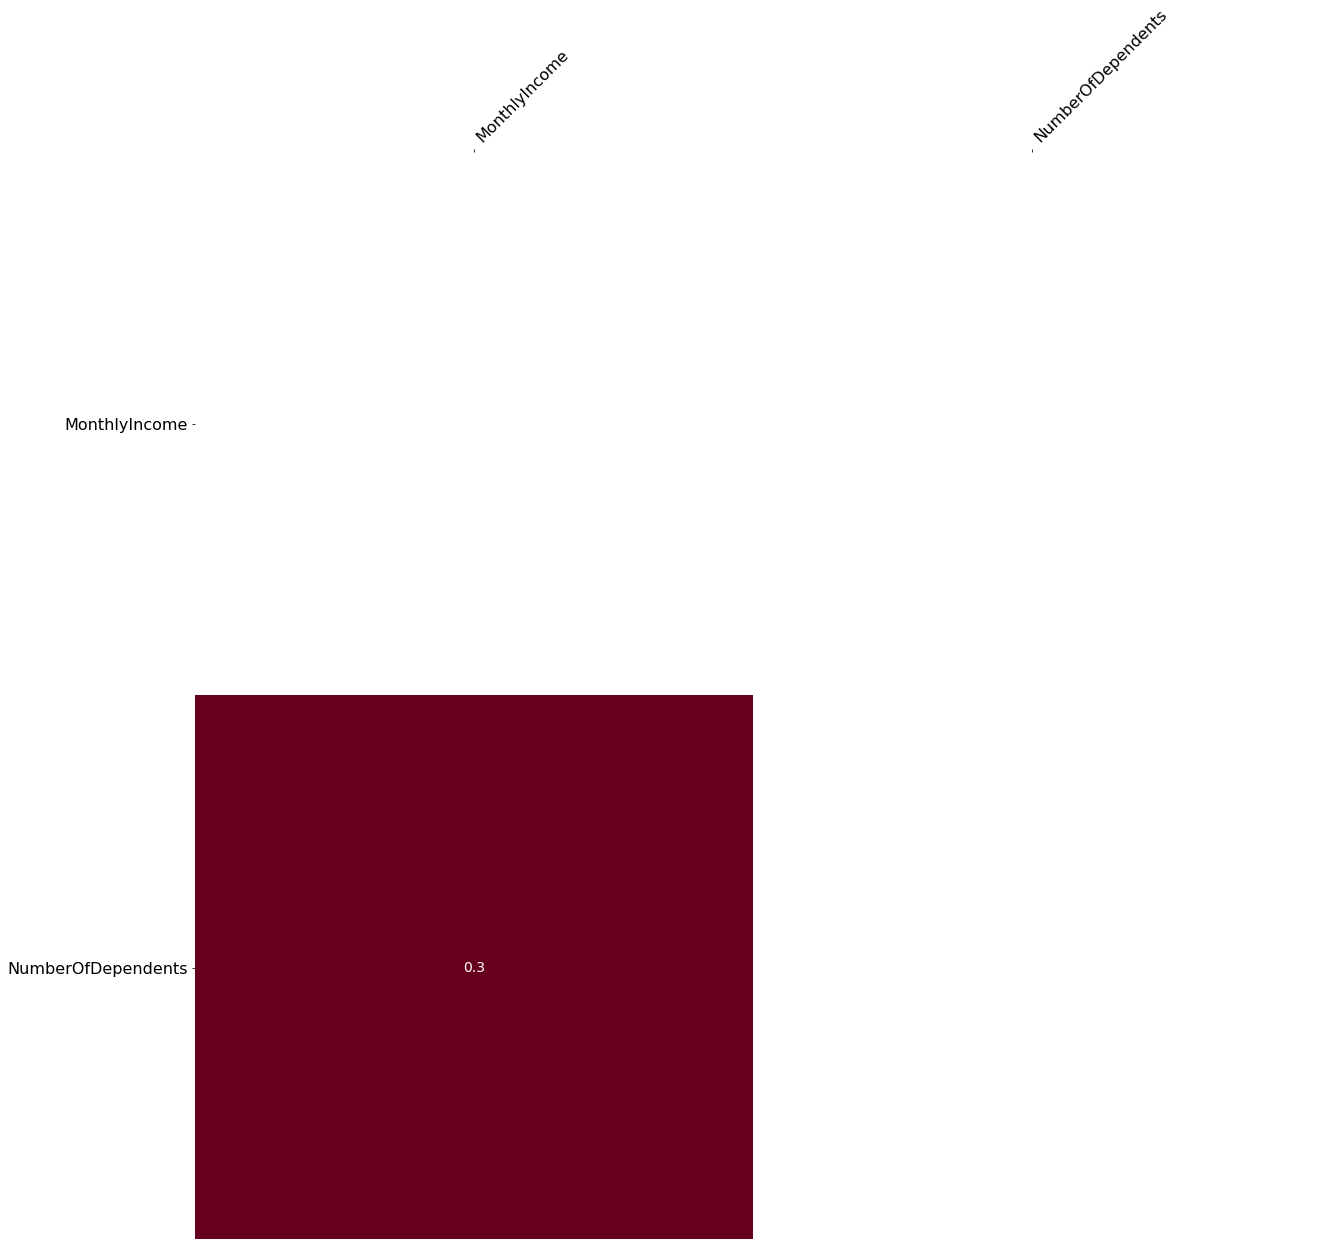

In [13]:
 msno.heatmap(df[missingValueColumns],figsize=(20,20))

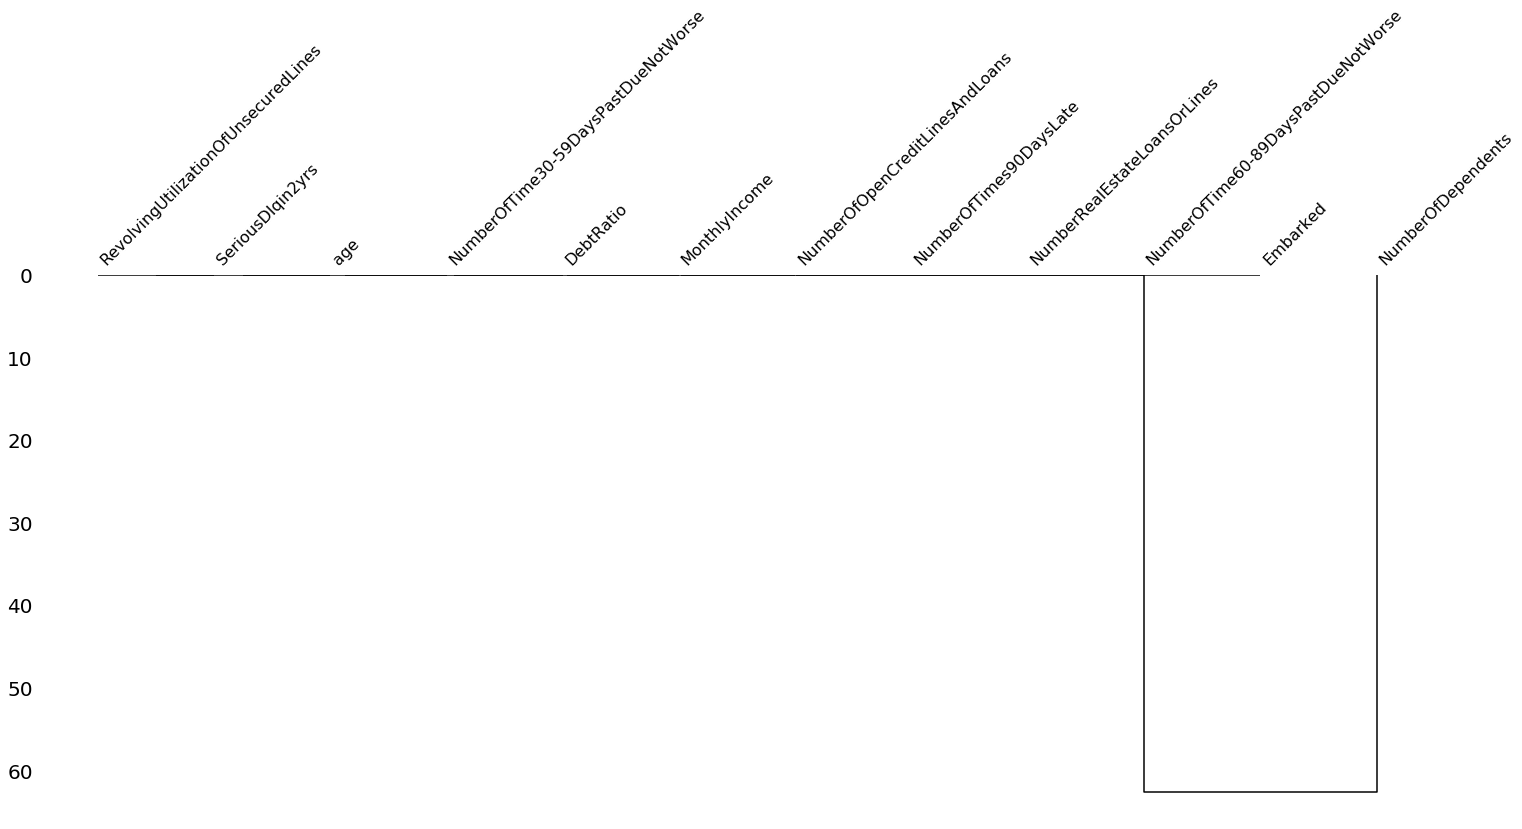

In [18]:
msno.dendrogram(df)